In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [53]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [54]:
# fashion_mnist=fetch_openml(name='Fashion-MNIST', version=1, cache=True, as_frame=False)

In [55]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [56]:
X=mnist.data
y=mnist.target
y[0]

'5'

In [57]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [58]:
y=y.astype(np.int8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [59]:
# 데이터 정규화
X=X/255
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

레이블 :  5


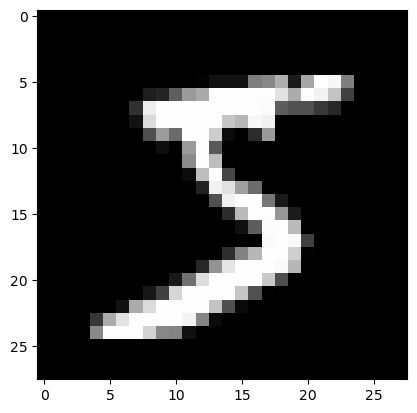

In [60]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print('레이블 : ', y[0])

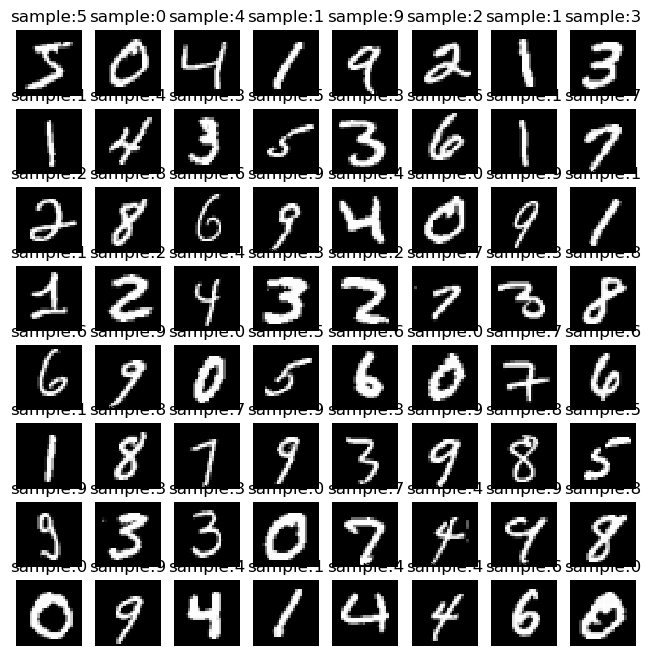

In [61]:
plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.axis('off') #축없애기
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.title("sample:%d"%y[i])
plt.show()    

In [62]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [63]:
import torch
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/7, random_state=0)

X_train=torch.Tensor(X_train)
X_test=torch.Tensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784]) torch.Size([60000]) torch.Size([10000])


In [83]:
ds_train=TensorDataset(X_train, y_train)
ds_test=TensorDataset(X_test, y_test)

In [84]:
loader_train=DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test=DataLoader(ds_test, batch_size=64, shuffle=True)

In [85]:
from torch import nn

model=nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [86]:
from torch import optim
loss_fn=nn.CrossEntropyLoss()

optimizer=optim.Adam(model.parameters(), lr=0.01)

In [87]:
costs, accuracys, epochs=[],[],[]

In [88]:
# 트레이닝 함수
def train(epoch):
    model.train() #모델을 훈련시킨다
    cost=0
    accuracy=0

    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs=model(data)
        loss=loss_fn(outputs, targets)

        _, y_hat=torch.max(outputs.data,1) #최대값을 찾아서 인덱스와 y_hat으로 출력
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum() # 찾은 정답과 실제 정답만 찾아서 더해준다
        cost+=loss.item()
        loss.backward()
        optimizer.step()

    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy.detach().numpy()/60000)
    print('epoch{}:cost={}, Accuracy={}\n'.format(epoch, cost, accuracy/60000))

In [89]:
def test():
    model.eval() # 신경망을 추론(예측) 모드로 전환
    correct=0

    with torch.no_grad() : #추론(예측)과정에서 미분을 하지 않게 해줌
        for data, targets in loader_test:
            outputs=model(data)
            _, prodicted=torch.max(outputs.data,1)
            correct +=prodicted.eq(targets.data.view_as(prodicted)).sum()
    data_num=len(loader_test.dataset)
    print("\n테스트 데이터에서 예측 정확도:{}/{}({:.2f}%)\n".format(correct,data_num, 100.*correct/data_num))        

In [90]:
test()


테스트 데이터에서 예측 정확도:679/10000(6.79%)



In [91]:
for epoch in range(30):
    train(epoch)
test()    

epoch0:cost=238.41935396939516, Accuracy=0.9236999750137329

epoch1:cost=141.62383538018912, Accuracy=0.9575333595275879

epoch2:cost=123.01821584242862, Accuracy=0.9627666473388672

epoch3:cost=104.50724679324776, Accuracy=0.9682999849319458

epoch4:cost=96.43821613292675, Accuracy=0.9713500142097473

epoch5:cost=95.27580013521947, Accuracy=0.9721166491508484

epoch6:cost=87.53770379995694, Accuracy=0.9746833443641663

epoch7:cost=83.32977940706769, Accuracy=0.9763666391372681

epoch8:cost=72.48584331720485, Accuracy=0.9787999987602234

epoch9:cost=74.2268809453235, Accuracy=0.9793000221252441

epoch10:cost=73.85219774438883, Accuracy=0.9796000123023987

epoch11:cost=69.2128423677641, Accuracy=0.9807166457176208

epoch12:cost=67.64699651495903, Accuracy=0.9815999865531921

epoch13:cost=58.54172628538072, Accuracy=0.9836500287055969

epoch14:cost=62.197124663129216, Accuracy=0.983299970626831

epoch15:cost=63.57104297825936, Accuracy=0.9830833077430725

epoch16:cost=58.57383517640483, 

o: tensor([ -45.0673,  -17.0258,  -24.8790,  -16.4271,   -7.3984,  -22.5425,
        -185.7654,   28.7891,   -6.5847,    9.6214], grad_fn=<AddBackward0>)
pred: torch.return_types.max(
values=tensor(28.7891),
indices=tensor(7))
predicted: tensor(7)
예측 결과 : 7


<function matplotlib.pyplot.show(close=None, block=None)>

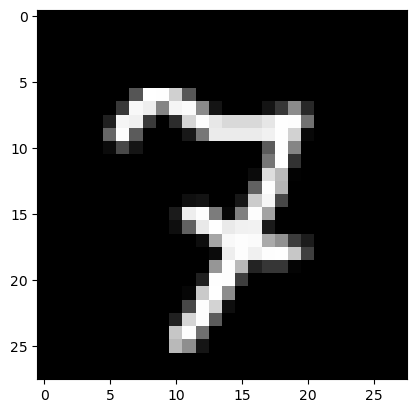

In [99]:
index=100
model.eval()
data=X_test[index]
output=model(data)
print("o:", output)
pred=torch.max(output.data, 0)
print('pred:', pred)
_, predicted=torch.max(output.data, 0) #확률이 가장 높은 레이블이 무엇인지 계산
print("predicted:", predicted)

print("예측 결과 : {}".format(predicted))

X_test_show=(X_test[index]).numpy()

plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show

In [102]:
predictions=model(X_test)
predicted=[]
for i in range(len(predictions)):
    v, idx=torch.max(predictions[i],0)
    # predicted.append(idx) -> tensor로 쌓여있다
    predicted.append(idx.item())
predicted=torch.from_numpy(np.array(predicted))
print(predicted)
print(y_test)

tensor([0, 4, 1,  ..., 1, 3, 0], dtype=torch.int32)
tensor([0, 4, 1,  ..., 1, 3, 0])


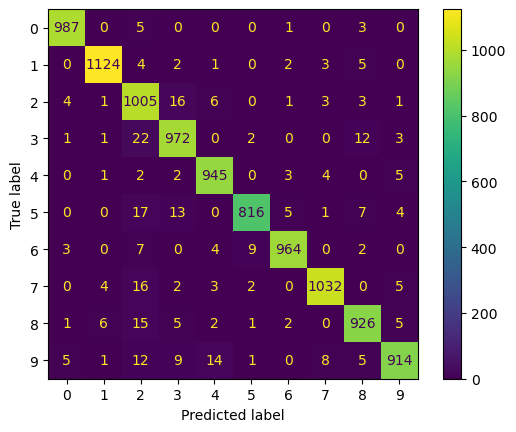

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(cm).plot()


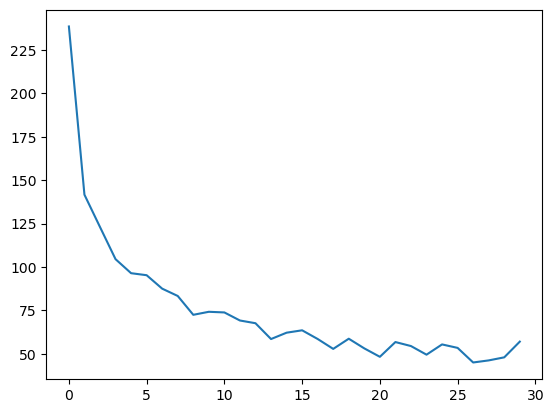

In [104]:
plt.plot(costs)

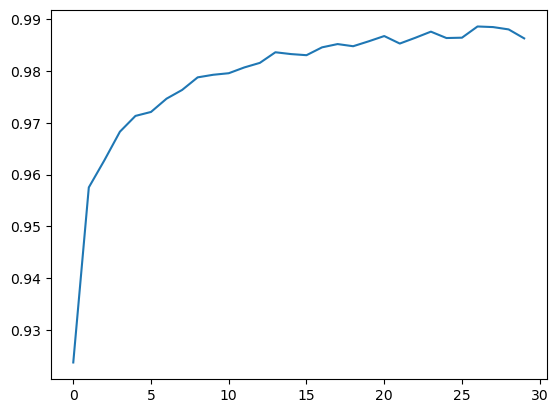

In [106]:
plt.plot(accuracys)